# Basic Portfolio Computation

This notebook serves as a practical guide to understanding how we can compute some of the theoretical concepts that we have learnt in Quant Finance using Python. Note that for most of these problems, there will be better solutions using pandas which we will learn. However, they are still useful for practicing and learning Python fundamentals.

In [1]:
# import our necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Computing Dollar Profits

We will define a function called ```compute_profits()``` takes as input *positions* and *returns* and returns a new dictionary that maps each ticker to the total dollar profit of that ticker (=ticker's return x dollars invested in ticker)

- The "pos" dictionary below represents the dollars initially invested in each ticker.
- The "ret" dictionary represents the returns of each ticker

Our profits for each ticker can be defined as the product of the position and the returns:
$$
profits_i = pos_i * ret_i
$$

In [2]:
# Given two dictionary of assets that contains their dollar invested and weights respectively, compute the portfolio profit.
pos = {'AAPL':1000,'TSLA':500,'BAC':-250,'GS':1200}
ret = {'AAPL':-0.01,'TSLA':0.05,'BAC':0.01,'GS':0.03}

# The portfolio return can be computed as the weighted average of the individual asset returns, weighted by their position sizes.
def compute_profits(positions, returns):
  profits = {}
  for asset in positions:
    if asset in returns:
      profits[asset] = positions[asset] * returns[asset]
  return profits

Now, let us compute our asset returns

In [3]:
# Output the profit for each asset
profits = compute_profits(pos, ret)
print("Portfolio Profits by asset:", profits)

Portfolio Profits by asset: {'AAPL': -10.0, 'TSLA': 25.0, 'BAC': -2.5, 'GS': 36.0}


Remarks:

---

This computation is useful especially if we want to compute the returns of our assets at a given point in time. Usually, this approach will come in handy when we want to derive our portfolio profits on a certain date, given the closing prices of our assets across time.

## Performance Statistics

- **rets** variable below is a list containing randomly generated, hypothetical daily returns of an asset
- The function ```compute_stats()```  takes as input **rets** and returns a new dictionary containing performance stats with (key:values) as specified below
    1. **avg**: average daily return
    2. **hit_rate**: percent of returns which are positive
    3. **max_ret**: max daily return

We shall initialise our numpy random seed to generate random returns simulating an asset return across time

In [5]:
np.random.seed(42)
rets = list(np.random.normal(0, 0.1/np.sqrt(252), 252)) # Generate 252 daily returns with mean 0 and std dev 10% annualized

In [6]:
# Define a function that computes the statistics 
def compuete_stats(returns):
  stats = {}
  stats['avg'] = np.mean(returns)
  stats['hit_rate'] = np.sum(np.array(returns) > 0) / len(returns)
  stats['max_ret'] = np.max(returns)
  return stats

Output the statistics for our given asset

In [7]:
asset_stat = compuete_stats(rets)
print("Asset Performance Statistics:", asset_stat)

Asset Performance Statistics: {'avg': -2.3716471698003256e-05, 'hit_rate': 0.5158730158730159, 'max_ret': 0.024269927125189435}


## Signal Analysis

- **rets** variable below is a list containing randomly generated, hypothetical daily returns
- **signal** variable below represents a daily hypothetical signal that could be predictive of **rets**
- The function *analyze_signal* takes as input **rets** and **signal** and returns a new dictionary with (key:values) as specified below
    1. **pos_ret**: average daily return when the signal is > 1
    2. **neg_ret**: average daily return when the signal is < -1
    3. **spread**: **pos_ret** - **neg_ret**

In [8]:
rets = list(np.random.normal(0, 0.1/np.sqrt(252), 252)) # Generate 252 daily returns with mean 0 and std dev 10% annualized
signal = list(np.random.normal(0, 1, 252)) # Generate 252 daily signals with mean 0 and std dev 1

def analyze_signal(returns, signal):
  pos_ret = np.mean([ret for ret, sig in zip(returns, signal) if sig > 1])
  neg_ret = np.mean([ret for ret, sig in zip(returns, signal) if sig < -1])
  spread = pos_ret - neg_ret
  return {'pos_ret': pos_ret, 'neg_ret': neg_ret, 'spread': spread}

Output the signal for our given asset

In [9]:
signal_analysis = analyze_signal(rets, signal)
print("Signal Analysis Results:", signal_analysis)

Signal Analysis Results: {'pos_ret': 0.00016805393551218127, 'neg_ret': 0.0008723421555899688, 'spread': -0.0007042882200777876}


Remarks

---

Signal analysis is extemely important and forms the core of systematic trading, as it decides on whether we will LONG or SHORT an asset, ENTER or EXIT a position, given the values from our signal. We also use signals as a means of measuring our returns, through the simulation of holding a position in our asset.

## Dollar Profits with Pandas Dataframe

- **rets** variable below is a DataFrame containing randomly generated, hypothetical daily returns. Rows represent days and columns represent symbols.
- **dollarpos** variable below is a DataFrame containing randomly generated initial dollar positions in each symbol at the close of market the prior day. 
  - Note: This dollar position randomisation is really subjective and just for illustrative purposes, as each asset in the stock market have varying means and standard deviation. For practise, we just assume 5 different assets with the same mean of 1000 and standard deviation of 100

With that, let us:
- Compute the dollar profit in each symbol on a given day as a DataFrame
- Plot the cumulative dollar profit of the assets across time

In [10]:
# Create a dataframe of random returns for multiple assets
rets = np.random.normal(0, 0.1/np.sqrt(252), (1000, 5))  # Generate 1000 daily returns with mean 0 and std dev 10% annualized across 5 assets
columns = ['A', 'B', 'C', 'D', 'E'] # Establish our column names
rets_df = pd.DataFrame(rets, columns=columns)

# Create a dataframe of random initial dollar positions in each symbol at the close of market the prior day
dollarpos = np.random.normal(1000, 100, (1000, 5)) # Our randomised dollar positions for each asset
dollarpos_df = pd.DataFrame(dollarpos, columns=columns)

# Dollar profit computation
profit_df = rets_df * dollarpos_df # Simply multiply the two dataframes element-wise to get dollar profits
profit_df

,A,B,C,D,E
0,3.284875,1.125768,-5.126695,4.787931,-3.636850
1,0.808298,14.544431,-0.520112,7.317357,-4.288359
2,-0.234214,11.065858,-4.030516,9.563880,5.300362
3,-3.485013,4.261699,5.614284,4.037683,-8.602779
4,-4.787605,-1.503717,-0.470255,4.182765,0.981439
...,...,...,...,...,...
995,0.280261,6.109447,-1.135126,-3.260379,-1.198461
996,4.200006,8.005199,-3.793742,0.532552,2.338614
997,-6.342335,0.117988,-8.870737,-13.014128,2.293427
998,-2.374237,1.154292,-0.091371,-6.052307,-0.294354


Plot the cumulative dollar profit of the assets across time

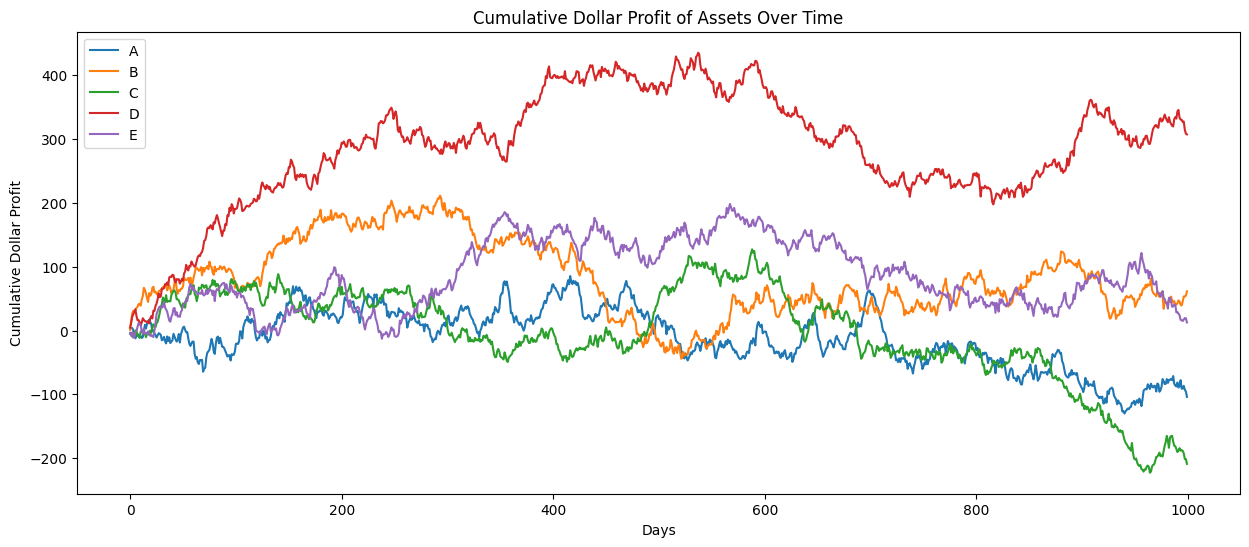

In [13]:
cumulative_profit = profit_df.cumsum()
cumulative_profit.plot(title='Cumulative Dollar Profit of Assets Over Time')
plt.xlabel('Days')
plt.ylabel('Cumulative Dollar Profit')
plt.gcf().set_size_inches(15, 6) # Increase the size of the plot for better visibility
plt.show()

## Stock Performance Statistics

- **rets** variable below is a DataFrame containing randomly generated, hypothetical daily returns. Rows represent days and columns represent symbols.
- The function ```compute_stock_stats()``` takes as input **rets** and returns a new DataFrame *(stats)* containing our performance statistics as specified below. The rows of the dataframe are the performance metrics and the columns are the assets.
    1. **avg**: average return (annualized)
    2. **vol**: volatility (annualized)
    3. **sharpe**: sharpe ratio (annualzied)
    4. **hit_rate**: percent of returns which are positive
- Following that, we will plot the sharpe ratios of each asset in ascending order.

In [ ]:
# Take the returns from above cell and compute stock performance statistics
def compute_stock_stats(returns_df):
  stats = pd.DataFrame(index=['avg', 'vol', 'sharpe', 'hit_rate'], columns=returns_df.columns)
  # Compute the statistics for each asset
  for col in returns_df.columns:
    avg_return = returns_df[col].mean() * 252  # Annualized average return
    vol = returns_df[col].std() * np.sqrt(252)  # Annualized volatility
    sharpe = avg_return / vol # Sharpe ratio
    hit_rate = (returns_df[col] > 0).mean()  # Hit rate
    
    stats.at['avg', col] = avg_return
    stats.at['vol', col] = vol
    stats.at['sharpe', col] = sharpe
    stats.at['hit_rate', col] = hit_rate
  return stats

Output the statistics fpr our given assets

In [ ]:
asset_stats = compute_stock_stats(rets_df)
print("Asset Performance Statistics DataFrame:")
asset_stats

Asset Performance Statistics DataFrame:


,A,B,C,D,E
avg,-0.03076,0.021154,-0.045025,0.0736,0.004928
vol,0.102481,0.100852,0.094588,0.097536,0.101755
sharpe,-0.30015,0.209754,-0.47601,0.754598,0.048434
hit_rate,0.483,0.514,0.5,0.51,0.501


Plot the Sharpe ratios of each asset in ascending order

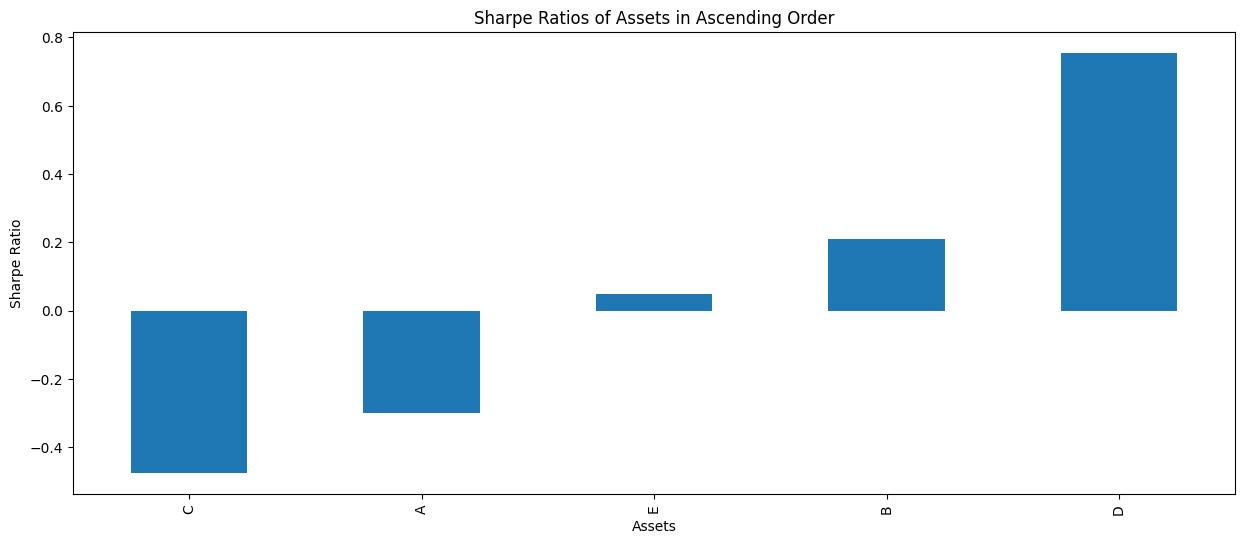

In [23]:
sharpe_ratios = asset_stats.loc['sharpe'].astype(float).sort_values()
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios of Assets in Ascending Order')
plt.xlabel('Assets')
plt.ylabel('Sharpe Ratio')
plt.gcf().set_size_inches(15, 6) # Increase the size of the plot for better visibility
plt.show()

## Simple Reversal Signal

- **rets** variable below is a DataFrame containing randomly generated, hypothetical daily returns. Rows represent days and columns represent symbols
- The function ```reversal_signal()``` takes as input **rets** and returns a new DataFrame *(signal)* which has the same rows/columns as rets. The values of signal are 
  - 1 if the symbol had the worst return that day
  - -1 if it had the best return
  - 0 otherwise

Following that, we will plot the value of signal through time for "A"

In [25]:
# Reuse the returns from above cell to compute a simple reversal signal
def reversal_signal(returns_df):
  signal = pd.DataFrame(0, index=returns_df.index, columns=returns_df.columns) # We create a dataframe of zeros with same shape as returns_df
  for idx, row in returns_df.iterrows():
    worst_asset = row.idxmin() # For that given row, get the index of the asset with the worst return that day
    best_asset = row.idxmax() # For that given row, get the index of the asset with the best return that day
    signal.at[idx, worst_asset] = 1 # Set the worst performing asset to 1
    signal.at[idx, best_asset] = -1 # Set the best performing asset to -1
  return signal

Compute the reversal signals

In [27]:
signals_df = reversal_signal(rets_df)
signals_df.head()

,A,B,C,D,E
0,0,0,1,-1,0
1,0,-1,0,0,1
2,0,0,1,-1,0
3,0,0,-1,0,1
4,1,0,0,-1,0


Plot the signals for our assets. Combine the plots into a single figure with subplots

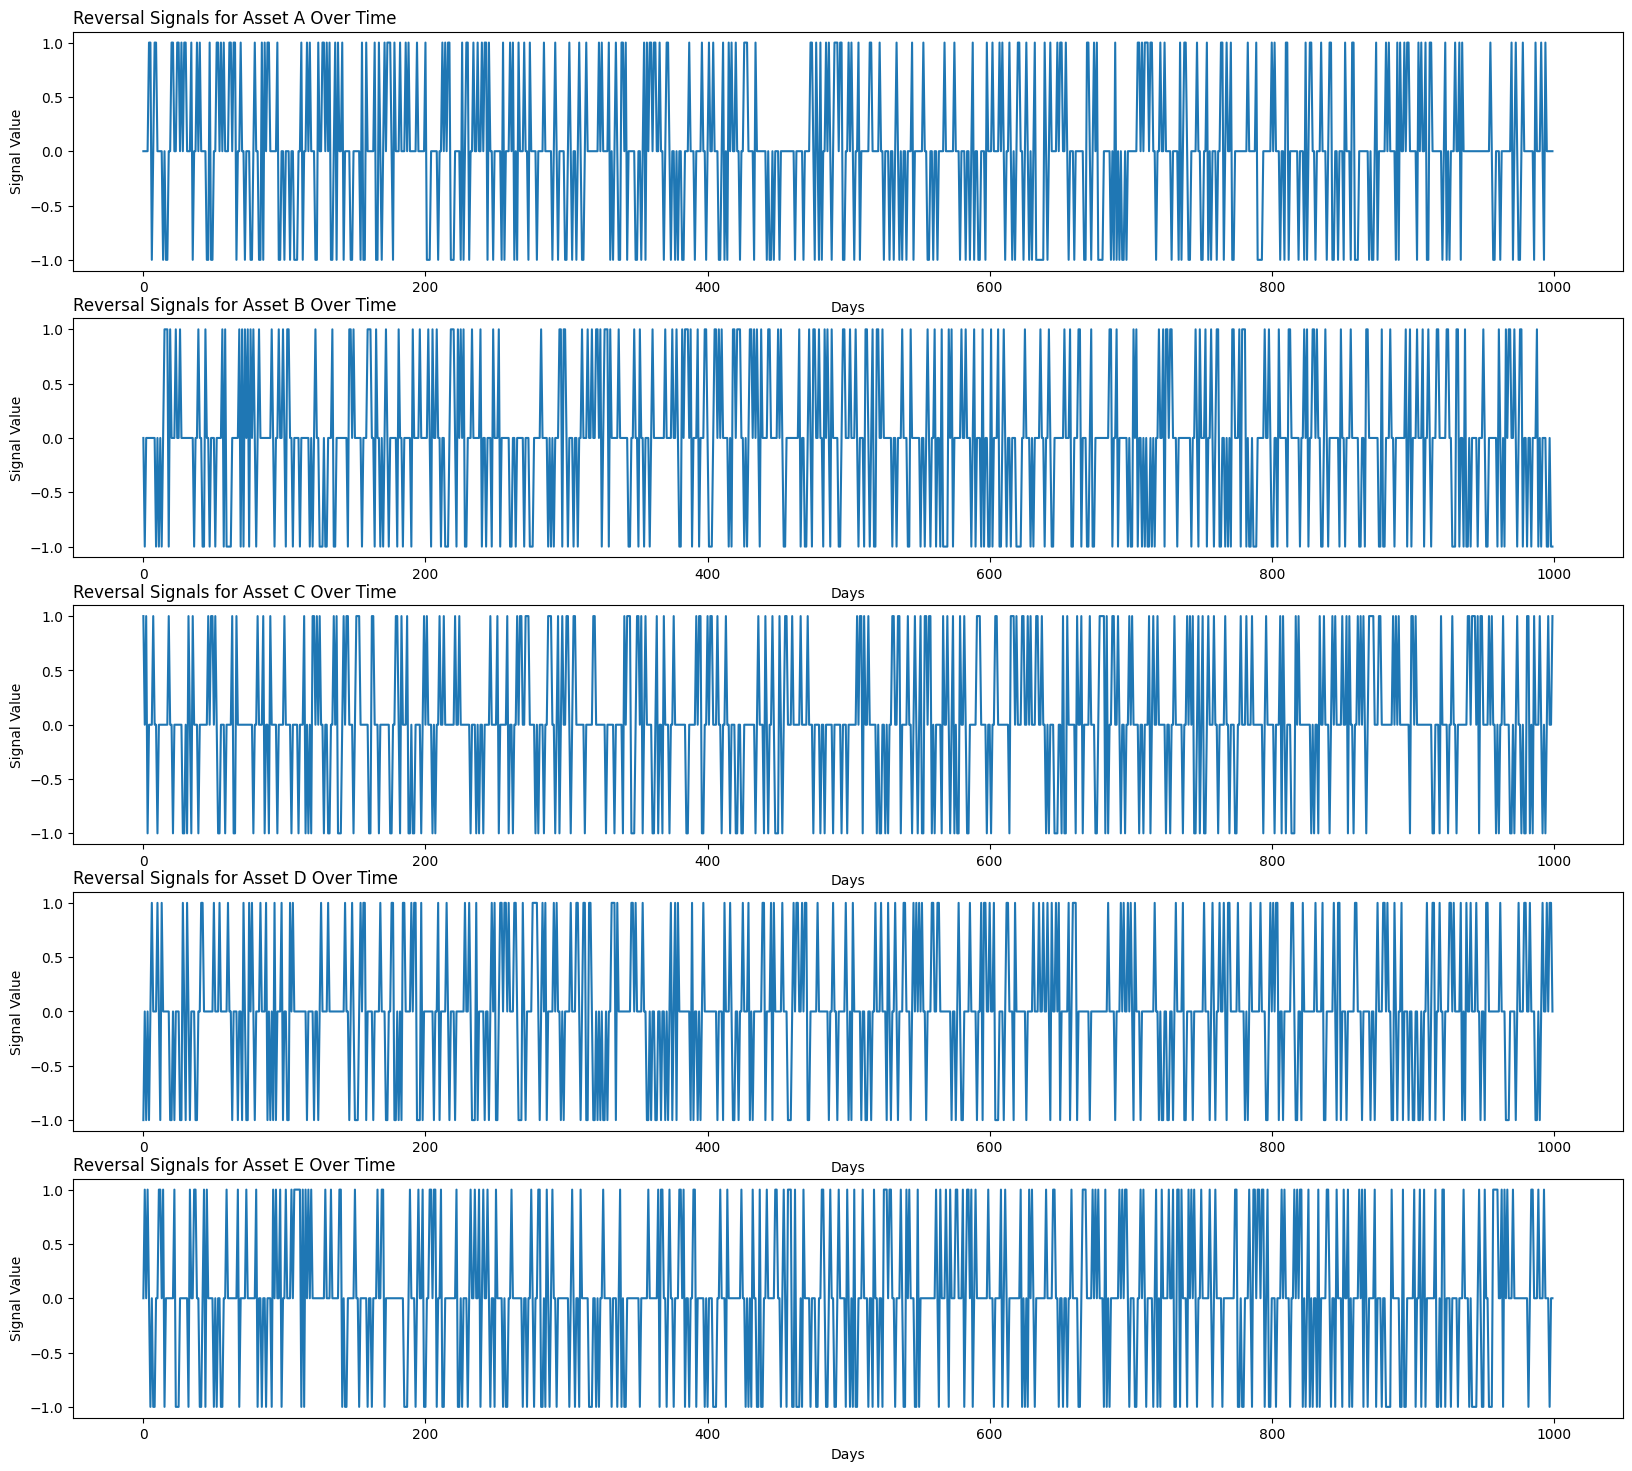

In [30]:
assets = list(signals_df.columns)
fig, axs = plt.subplots(len(assets), 1, figsize=(20, 18))
for idx, asset in enumerate(assets):
  signals_df[asset].plot(ax=axs[idx])
  axs[idx].set_title(f'Reversal Signals for Asset {asset} Over Time', loc='left')
  axs[idx].set_xlabel('Days')
  axs[idx].set_ylabel('Signal Value')
plt.show()

This concludes the segment of basic portfolio computation in Python. The subsequent notebooks will delve deeper into how strategies are devised.